In [1]:
%matplotlib inline
from tqdm import trange
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data', one_hot=True)

Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [4]:
keep_prob = tf.placeholder(tf.float32)

In [6]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [7]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))

In [8]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)  ## 550

In [11]:
for epoch in trange(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.8})
        total_cost += cost_val
    print('Epoch: %04d' % (epoch+1), 'Avg. cost={:.3f}'.format(total_cost / total_batch))
print("훈련 완료!!!")

  0%|                                                                                         | 0/30 [00:00<?, ?it/s]

Epoch: 0001 Avg. cost=0.428


  3%|██▋                                                                              | 1/30 [00:09<04:33,  9.44s/it]

Epoch: 0002 Avg. cost=0.169


  7%|█████▍                                                                           | 2/30 [00:17<04:11,  8.98s/it]

Epoch: 0003 Avg. cost=0.116


 10%|████████                                                                         | 3/30 [00:25<03:55,  8.71s/it]

Epoch: 0004 Avg. cost=0.091


 13%|██████████▊                                                                      | 4/30 [00:34<03:46,  8.73s/it]

Epoch: 0005 Avg. cost=0.072


 17%|█████████████▌                                                                   | 5/30 [00:41<03:28,  8.36s/it]

Epoch: 0006 Avg. cost=0.061


 20%|████████████████▏                                                                | 6/30 [00:50<03:20,  8.34s/it]

Epoch: 0007 Avg. cost=0.052


 23%|██████████████████▉                                                              | 7/30 [00:57<03:07,  8.15s/it]

Epoch: 0008 Avg. cost=0.044


 27%|█████████████████████▌                                                           | 8/30 [01:05<02:56,  8.00s/it]

Epoch: 0009 Avg. cost=0.040


 30%|████████████████████████▎                                                        | 9/30 [01:13<02:46,  7.91s/it]

Epoch: 0010 Avg. cost=0.037


 33%|██████████████████████████▋                                                     | 10/30 [01:20<02:36,  7.81s/it]

Epoch: 0011 Avg. cost=0.033


 37%|█████████████████████████████▎                                                  | 11/30 [01:28<02:27,  7.74s/it]

Epoch: 0012 Avg. cost=0.032


 40%|████████████████████████████████                                                | 12/30 [01:37<02:26,  8.16s/it]

Epoch: 0013 Avg. cost=0.029


 43%|██████████████████████████████████▋                                             | 13/30 [01:45<02:16,  8.06s/it]

Epoch: 0014 Avg. cost=0.027


 47%|█████████████████████████████████████▎                                          | 14/30 [01:52<02:06,  7.93s/it]

Epoch: 0015 Avg. cost=0.028


 50%|████████████████████████████████████████                                        | 15/30 [02:00<01:56,  7.80s/it]

Epoch: 0016 Avg. cost=0.023


 53%|██████████████████████████████████████████▋                                     | 16/30 [02:07<01:48,  7.76s/it]

Epoch: 0017 Avg. cost=0.021


 57%|█████████████████████████████████████████████▎                                  | 17/30 [02:15<01:40,  7.72s/it]

Epoch: 0018 Avg. cost=0.023


 60%|████████████████████████████████████████████████                                | 18/30 [02:23<01:32,  7.71s/it]

Epoch: 0019 Avg. cost=0.022


 63%|██████████████████████████████████████████████████▋                             | 19/30 [02:30<01:24,  7.71s/it]

Epoch: 0020 Avg. cost=0.017


 67%|█████████████████████████████████████████████████████▎                          | 20/30 [02:38<01:16,  7.70s/it]

Epoch: 0021 Avg. cost=0.021


 70%|████████████████████████████████████████████████████████                        | 21/30 [02:46<01:08,  7.63s/it]

Epoch: 0022 Avg. cost=0.018


 73%|██████████████████████████████████████████████████████████▋                     | 22/30 [02:54<01:02,  7.76s/it]

Epoch: 0023 Avg. cost=0.020


 77%|█████████████████████████████████████████████████████████████▎                  | 23/30 [03:01<00:53,  7.67s/it]

Epoch: 0024 Avg. cost=0.017


 80%|████████████████████████████████████████████████████████████████                | 24/30 [03:09<00:45,  7.63s/it]

Epoch: 0025 Avg. cost=0.016


 83%|██████████████████████████████████████████████████████████████████▋             | 25/30 [03:16<00:37,  7.59s/it]

Epoch: 0026 Avg. cost=0.017


 87%|█████████████████████████████████████████████████████████████████████▎          | 26/30 [03:24<00:30,  7.60s/it]

Epoch: 0027 Avg. cost=0.018


 90%|████████████████████████████████████████████████████████████████████████        | 27/30 [03:31<00:22,  7.57s/it]

Epoch: 0028 Avg. cost=0.018


 93%|██████████████████████████████████████████████████████████████████████████▋     | 28/30 [03:39<00:15,  7.54s/it]

Epoch: 0029 Avg. cost=0.016


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 29/30 [03:47<00:07,  7.60s/it]

Epoch: 0030 Avg. cost=0.017


100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [03:54<00:00,  7.62s/it]


훈련 완료!!!


In [12]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

정확도: 0.9825


In [13]:
labels = sess.run(model, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})

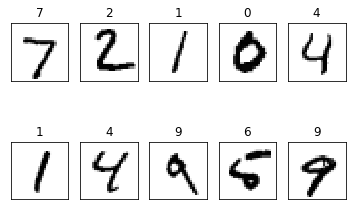

In [14]:
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [15]:
sess.close()

In [16]:
# end 